In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [2]:
# Read in data
dummy_variables = pd.read_csv('Data/dummy_variables.csv')

In [3]:
# Print data
print(dummy_variables)

      Unnamed: 0                       Sample ID         Standardized  \
0              0  GENIE-CHOP-C1204785-BSEQR5EWF3  C1204785-BSEQR5EWF3   
1              1  GENIE-CHOP-C1278462-BSDZJGE0K4  C1278462-BSDZJGE0K4   
2              2  GENIE-CHOP-C2419533-BSGAM8FWDY  C2419533-BSGAM8FWDY   
3              3  GENIE-CHOP-C2780169-BSAQPPSDSZ  C2780169-BSAQPPSDSZ   
4              4  GENIE-CHOP-C3974991-BSC2G24YG8  C3974991-BSC2G24YG8   
...          ...                             ...                  ...   
2347        2347             GENIE-YALE-TPL350-1             TPL350-1   
2348        2348             GENIE-YALE-TPL484-1             TPL484-1   
2349        2349             GENIE-YALE-TPL807-1             TPL807-1   
2350        2350             GENIE-YALE-TPL879-1             TPL879-1   
2351        2351             GENIE-YALE-TPL931-1             TPL931-1   

                            Cancer Type Detailed  STAT5A  HIST1H3B  IRS2  \
0                        Mature B-Cell Neoplasm

In [4]:
# Remove unnecessary columns
dummy_variables = dummy_variables.loc[:, dummy_variables.columns != "Unnamed: 0"]
dummy_variables = dummy_variables.loc[:, dummy_variables.columns != "Standardized"]

In [5]:
# Isolate sample IDs
sample_ids = dummy_variables["Sample ID"]

In [6]:
# Isolate mutations
mutations = dummy_variables.values.tolist()
df = pd.DataFrame(mutations, index = sample_ids)

In [7]:
# Isolate genes
genes = list(dummy_variables.head(1))[1:-1]

In [8]:
# Get sum of mutations of each cancer type of interest
types = ["Mantle Cell Lymphoma", "Primary DLBCL of the central nervous system", "Follicular Lymphoma"]
counts = {}
for type in types:
    new_dummy = dummy_variables.drop(dummy_variables.index[(dummy_variables["Cancer Type Detailed"] != type)], inplace = False)
    new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
    count_type = new_dummy["KMT2D"].count()
    counts[type] = count_type
print(counts)

{'Mantle Cell Lymphoma': 259, 'Primary DLBCL of the central nervous system': 541, 'Follicular Lymphoma': 454}


/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/2494986566.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/2494986566.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/2494986566.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid 

In [28]:
# Generate table of means # mutations for each cancer type
#all_types = ["Extraosseous Plasmacytoma", "Follicular Lymphoma", "Lymphoplasmacytic Lymphoma", "Mantle Cell Lymphoma", "Marginal Zone Lymphoma",
             #"Mature B-Cell Neoplasms", "Nodal Marginal Zone Lymphoma",
             #"Primary DLBCL of the central nervous system", "Primary Mediastinal Large B-Cell Lymphoma", "Splenic Marginal Zone Lymphoma",
             #"Testicular Lymphoma", "Waldenstrom Macroglobulinemia"]
all_types = ["Follicular Lymphoma", "Mantle Cell Lymphoma", "Primary DLBCL of the central nervous system"]
means = {}
for type in all_types:
    new_dummy = dummy_variables.drop(dummy_variables.index[(dummy_variables["Cancer Type Detailed"] != type)], inplace = False)
    new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
    mean_type = new_dummy["Number of Mutated Genes"].mean()
    means[type] = mean_type

/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/1133484774.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/1133484774.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_12851/1133484774.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only val

In [29]:
# Print means for each disease type in table format
stat = pd.DataFrame.from_dict(means, orient='index')
stat = stat.dropna()
print(stat)

                                                      0
Follicular Lymphoma                           98.863436
Mantle Cell Lymphoma                          18.420849
Primary DLBCL of the central nervous system  333.874307


In [30]:
# Convert dictionary to lists for plotting
#x_vals = ['EP', "FL", 'LL', "MCL", "MZL", "MBN", "MBL", "NMZL", "NHL", "PL", "DLBCL", "SMZL", "TL", "WM"]
x_vals = []
y_vals = []

for key, value in means.items():
    #if key != "Primary Mediastinal Large B-Cell Lymphoma":
    x_vals.append(key)
    y_vals.append(value)
#wrapped_x = [ val.replace(' ', '\n') for val in x_vals ]
wrapped_x = ["FL", "MCL", "DLBCL"]
print(wrapped_x)
print(y_vals)

['FL', 'MCL', 'DLBCL']
[98.86343612334802, 18.42084942084942, 333.8743068391867]


<ErrorbarContainer object of 3 artists>

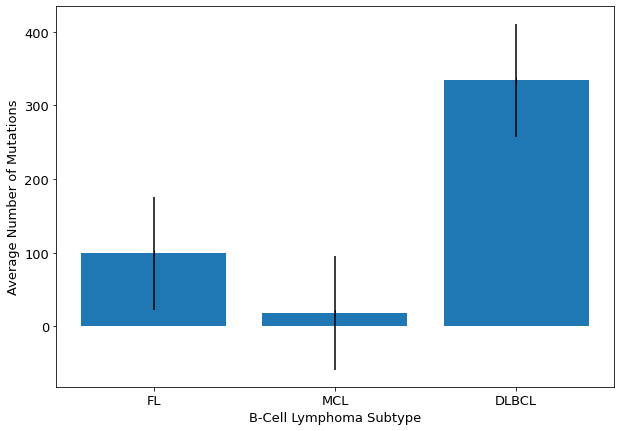

In [45]:
# Plot mean for each disease type
plt.figure(figsize=(10, 7))
plt.rc('xtick', labelsize = 13) 
plt.rc('ytick', labelsize = 13) 
plt.xlabel("B-Cell Lymphoma Subtype")
plt.ylabel("Average Number of Mutations")
plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.bar(wrapped_x, y_vals)
plt.errorbar(wrapped_x, y_vals, yerr=77.27104841069817, fmt="|", color="black")

In [16]:
# Calculate counts for Fisher's Exact Test setup
def gather_counts(disease1, disease2, gene):
    cts = {}
    new_dummy = dummy_variables.drop(dummy_variables.index[(dummy_variables["Cancer Type Detailed"] != disease1)], inplace = False)
    cts[disease1] = new_dummy[gene].sum()
    #new_dummy['Number of Mutated Genes'] = new_dummy.iloc[:, 1:].sum(axis=1)
    notdisease1 = new_dummy.iloc[:, 1:].sum(axis=1).sum() - new_dummy[gene].sum()
    cts["Not " + disease1] = notdisease1

    new_dummy = dummy_variables.drop(dummy_variables.index[(dummy_variables["Cancer Type Detailed"] != disease2)], inplace = False)
    cts[disease2] = new_dummy[gene].sum()
    notdisease2 = new_dummy.iloc[:, 1:].sum(axis=1).sum() - new_dummy[gene].sum()
    cts["Not " + disease2] = notdisease2

    return cts
cts = gather_counts("Follicular Lymphoma", "Mantle Cell Lymphoma", "EZH2")
print(cts)

{'Follicular Lymphoma': 9.0, 'Not Follicular Lymphoma': 394.0, 'Mantle Cell Lymphoma': 0.0, 'Not Mantle Cell Lymphoma': 216.0}


/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_18430/1950996265.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notdisease1 = new_dummy.iloc[:, 1:].sum(axis=1).sum() - new_dummy[gene].sum()
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_18430/1950996265.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notdisease2 = new_dummy.iloc[:, 1:].sum(axis=1).sum() - new_dummy[gene].sum()


In [17]:
# Print Fisher's Exact Test setup values
stat = pd.DataFrame.from_dict(cts, orient='index')
stat = stat.dropna()
print(stat)

                              0
Follicular Lymphoma         9.0
Not Follicular Lymphoma   394.0
Mantle Cell Lymphoma        0.0
Not Mantle Cell Lymphoma  216.0


In [20]:
# Conduct Fisher's Exact Test: return p-value
def fisher_exact(disease1, disease2):
    d1 = cts[disease1]
    d2 = cts[disease2]
    notd1 = cts['Not ' + disease1]
    notd2 = cts['Not ' + disease2]
    sumd1 = d1 + notd1
    sumd2 = d2 + notd2
    mut = d1 + d2
    notmut = notd1 + notd2
    total = mut + notmut
    data = [[float(d1), float(notd1)], [float(d2), float(notd2)]]
    print(data)

    p_value_num = (math.factorial(sumd1) * math.factorial(sumd2) * math.factorial(mut) * math.factorial(notmut))
    indiv = math.factorial(d2) * math.factorial(notd2) * math.factorial(d1) * math.factorial(notd1)
    p_value_denom = (math.factorial(total)*indiv)

    p_value = p_value_num / p_value_denom
    return p_value

print(fisher_exact("Follicular Lymphoma", "Mantle Cell Lymphoma"))

[[9.0, 394.0], [0.0, 216.0]]
0.020362571633290125


/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_18430/3830608026.py:15: DeprecationWarning: Using factorial() with floats is deprecated
  p_value_num = (math.factorial(sumd1) * math.factorial(sumd2) * math.factorial(mut) * math.factorial(notmut))
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_18430/3830608026.py:16: DeprecationWarning: Using factorial() with floats is deprecated
  indiv = math.factorial(d2) * math.factorial(notd2) * math.factorial(d1) * math.factorial(notd1)
/var/folders/b7/ppmcfqq90vgdx0fr1q31fm4w0000gn/T/ipykernel_18430/3830608026.py:17: DeprecationWarning: Using factorial() with floats is deprecated
  p_value_denom = (math.factorial(total)*indiv)
